In [1]:
#load Data and pachakge
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


import os
print(os.listdir("../DATASET"))

['.idea', 'AAA Physician AI Research Opportunity!!!.pdf', 'BBox_List_2017.csv', 'convert data to code.ipynb', 'Data_Entry_2017.csv', 'FAQ_CHESTXRAY.pdf', 'HAM10000_metadata.csv', 'images', 'nih-chest-x-ray-multi-classification - Copy.ipynb', 'nih-chest-x-ray-multi-classification.ipynb', 'nih-cxr-lt_image_ids.csv', 'nih-cxr-lt_single-label_test.csv', 'nih-cxr-lt_single-label_train.csv', 'README_CHESTXRAY.pdf', 'test1.ipynb', 'test2.ipynb', 'test3.ipynb', 'test4.ipynb', 'test_list.txt', 'train_val_list.txt']


In [2]:
# load data
data = pd.read_csv('../DATASET/Data_Entry_2017.csv')

# see how many observations there are
num_obs = len(data)
print('Number of observations:',num_obs)

# examine the raw data before performing pre-processing
data.head(5) # view first 5 rows


Number of observations: 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
from glob import glob
#import os # already imported earlier

my_glob = glob('../DATASET/images/*.png')
print('Number of Observations: ', len(my_glob))

Number of Observations:  4999


In [4]:
full_img_paths = {os.path.basename(x): x for x in my_glob}
data['full_path'] = data['Image Index'].map(full_img_paths.get)

In [6]:
num_unique_labels = data['Finding Labels'].nunique()
print('Number of unique labels:',num_unique_labels)

# let's look at the label distribution to better plan our next step
count_per_unique_label = data['Finding Labels'].value_counts() # get frequency counts per label
df_count_per_unique_label = count_per_unique_label.to_frame()

Number of unique labels: 836


In [7]:
print(df_count_per_unique_label) # view tabular results

                                                    Finding Labels
No Finding                                                   60361
Infiltration                                                  9547
Atelectasis                                                   4215
Effusion                                                      3955
Nodule                                                        2705
...                                                            ...
Atelectasis|Consolidation|Edema|Effusion|Infilt...               1
Atelectasis|Consolidation|Effusion|Emphysema|Ma...               1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumo...               1
Edema|Infiltration|Pneumothorax                                  1
Atelectasis|Consolidation|Mass|Pleural_Thickeni...               1

[836 rows x 1 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'No Finding'),
  Text(1, 0, 'Infiltration'),
  Text(2, 0, 'Atelectasis'),
  Text(3, 0, 'Effusion'),
  Text(4, 0, 'Nodule'),
  Text(5, 0, 'Pneumothorax'),
  Text(6, 0, 'Mass'),
  Text(7, 0, 'Effusion|Infiltration'),
  Text(8, 0, 'Atelectasis|Infiltration'),
  Text(9, 0, 'Consolidation'),
  Text(10, 0, 'Atelectasis|Effusion'),
  Text(11, 0, 'Pleural_Thickening'),
  Text(12, 0, 'Cardiomegaly'),
  Text(13, 0, 'Emphysema'),
  Text(14, 0, 'Infiltration|Nodule'),
  Text(15, 0, 'Atelectasis|Effusion|Infiltration'),
  Text(16, 0, 'Fibrosis'),
  Text(17, 0, 'Edema'),
  Text(18, 0, 'Cardiomegaly|Effusion'),
  Text(19, 0, 'Consolidation|Infiltration')])

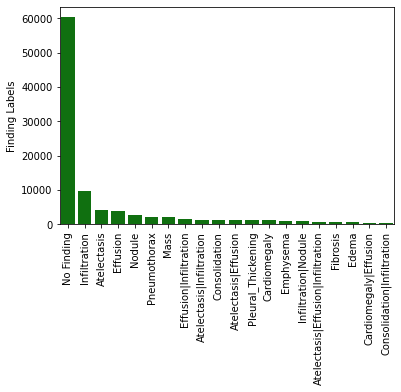

In [8]:
sns.barplot(x = df_count_per_unique_label.index[:20], y="Finding Labels", data=df_count_per_unique_label[:20], color = "green")
plt.xticks(rotation = 90) 

In [9]:
# define dummy labels for one hot encoding - simplifying to 14 primary classes (excl. No Finding)
dummy_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia'] 

# One Hot Encoding of Finding Labels to dummy_labels
for label in dummy_labels:
    data[label] = data['Finding Labels'].map(lambda result: 1.0 if label in result else 0)
data.head(20) # check the data, looking good!

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Infiltration          19894.0
Effusion              13317.0
Atelectasis           11559.0
Nodule                 6331.0
Mass                   5782.0
Pneumothorax           5302.0
Consolidation          4667.0
Pleural_Thickening     3385.0
Cardiomegaly           2776.0
Emphysema              2516.0
Edema                  2303.0
Fibrosis               1686.0
Pneumonia              1431.0
Hernia                  227.0
dtype: float64


(<Axes: ylabel='0'>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
  [Text(0, 0, 'Infiltration'),
   Text(1, 0, 'Effusion'),
   Text(2, 0, 'Atelectasis'),
   Text(3, 0, 'Nodule'),
   Text(4, 0, 'Mass'),
   Text(5, 0, 'Pneumothorax'),
   Text(6, 0, 'Consolidation'),
   Text(7, 0, 'Pleural_Thickening'),
   Text(8, 0, 'Cardiomegaly'),
   Text(9, 0, 'Emphysema'),
   Text(10, 0, 'Edema'),
   Text(11, 0, 'Fibrosis'),
   Text(12, 0, 'Pneumonia'),
   Text(13, 0, 'Hernia')]))

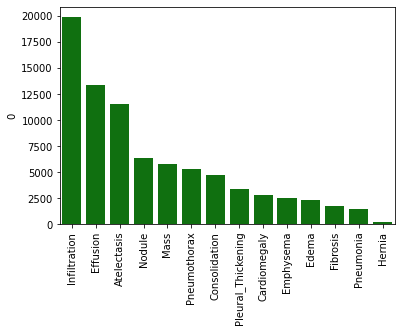

In [10]:
clean_labels = data[dummy_labels].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

In [12]:

# create vector as ground-truth, will use as actuals to compare against our predictions later
data['target_vector'] = data.apply(lambda target: [target[dummy_labels].values], 1).map(lambda target: target[0])

In [13]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,target_vector
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [14]:
# split the data into a training and testing set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1993)

# quick check to see that the training and test set were split properly
print('training set - # of observations: ', len(train_set))
print('test set - # of observations): ', len(test_set))
print('prior, full data set - # of observations): ', len(data))

training set - # of observations:  89696
test set - # of observations):  22424
prior, full data set - # of observations):  112120


In [29]:
from PIL import Image

# define a function to load and preprocess images
def load_and_preprocess_image(filepath):
    # load image as grayscale
    img = Image.open(filepath).convert('L')
    # resize image to 224x224
    img = img.resize((224, 224), resample=Image.BICUBIC)
    # convert image to numpy array
    img_arr = np.array(img)
    # normalize pixel values to be between 0 and 1
    img_arr = img_arr / 255.
    # add channel dimension to match shape expected by model
    img_arr = np.expand_dims(img_arr, axis=-1)
    # return preprocessed image array
    return img_arr

C:\Users\Timgad informatique\AppData\Local\Temp\ipykernel_6296\684938071.py:8: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  img = img.resize((224, 224), resample=Image.BICUBIC)


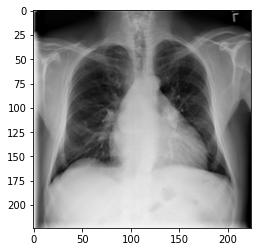

In [30]:
# example usage of load_and_preprocess_image function
img_path = data['full_path'][0] # get filepath of first image in dataset
img_arr = load_and_preprocess_image(img_path) # load and preprocess image
plt.imshow(img_arr[:,:,0], cmap='gray') # show preprocessed image

In [58]:
train_x = train_set.iloc[:, 12:].values # get input data from 12th column onwards (dummy labels)
train_y = np.array(train_set['target_vector'].tolist()) # get output data (target vectors)

test_x = test_set.iloc[:, 12:].values # get input data from 12th column onwards (dummy labels)
test_y = np.array(test_set['target_vector'].tolist()) # get output data (target vectors)

print('train_x shape: ', train_x.shape)
print('train_y shape: ', train_y.shape)
print('test_x shape: ', test_x.shape)
print('test_y shape: ', test_y.shape)


train_x shape:  (89696, 16)
train_y shape:  (89696,)
test_x shape:  (22424, 16)
test_y shape:  (22424,)


In [64]:
# build and train the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3) ),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(dummy_labels), activation='softmax')
])

In [65]:
# compile model, run summary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 26, 26, 128)     

In [66]:
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).